In [2]:
# Inspired by TheAthletic
# https://www.reddit.com/r/MCFC/comments/1201p2y/the_athletic_haaland_all_shots_in_pl_2223/

In [122]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

In [144]:
# visual_name = 'All non-penalty shots for Manchester City in Premier League in 2022-23'
visual_name = 'All shots for Manchester City in Premier League in 2022-23'

In [145]:
df = pd.read_csv("data/erling_haaland_2022-2023.csv")
# here
#   X - vertical
#   Y - horizontal

In [146]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479846,20,MissedShots,0.936,0.503,0.484085,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
1,479847,35,Goal,0.885,0.500,0.761169,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,NaN,Standard
2,479854,64,Goal,0.864,0.405,0.328053,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
3,479855,69,MissedShots,0.953,0.552,0.526608,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Jack Grealish,Chipped
4,479856,75,BlockedShot,0.894,0.710,0.066443,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Ilkay Gündogan,Pass


In [147]:
striker_name = df['player'].unique()[0]

In [148]:
# df = df[df['situation'] != 'Penalty']

In [149]:
# Convert 0-1 coordinates to 0-100 coordinates for visualization in mplsoccer
df['X_100'] = df['X'] * 100
df['Y_100'] = df['Y'] * 100

In [150]:
# We select Etihad stadium pitch size as it is home stadium for Erling Halland's team Manchester City. So, Erling plays most of the games there.
# Etihad stadium pitch size: 105x68 meters (UEFA standard)
x_meters = 105
y_meters = 68
# coordinates in meters of a goal
goal_coord_meters = (x_meters, y_meters / 2)

# convert coordinates to meters coordinated to further calculation of distance to the goal in meters
df['X_meters'] = df['X'] * x_meters
df['Y_meters'] = df['Y'] * y_meters

In [151]:
# Calculate metrics
#   Total shots
#   Right foot shots
#   Left foot shots
#   Head shots
#   Other shots
#   Total goals
#   Total xG
#   xG per shot
total_shots = df.shape[0]
right_foot_shots = df[df['shotType'] == 'RightFoot'].shape[0]
left_foot_shots = df[df['shotType'] == 'LeftFoot'].shape[0]
head_shots = df[df['shotType'] == 'Head'].shape[0]
other_shots = df[df['shotType'] == 'OtherBodyPart'].shape[0]
total_goals = df[df['result'] == 'Goal'].shape[0]
total_xG = df['xG'].sum()
xG_per_shot = total_xG / total_shots

In [152]:
# Calculate average shot distance to goal
#   Value in meters
df['distanceToGoal'] = np.sqrt((df['X_meters'] - goal_coord_meters[0])**2 + (df['Y_meters'] - goal_coord_meters[1])**2)
actual_average_distance = df['distanceToGoal'].mean()

#   Calc x-coordinate for plotting
point_average_distance = 100-actual_average_distance/goal_coord_meters[0]*100

In [153]:
# colors definition
background_color = '#0C0D0E'
red_color = '#bd202b'
white_color = 'white' 

___

Text(0.75, 0, '0.3')

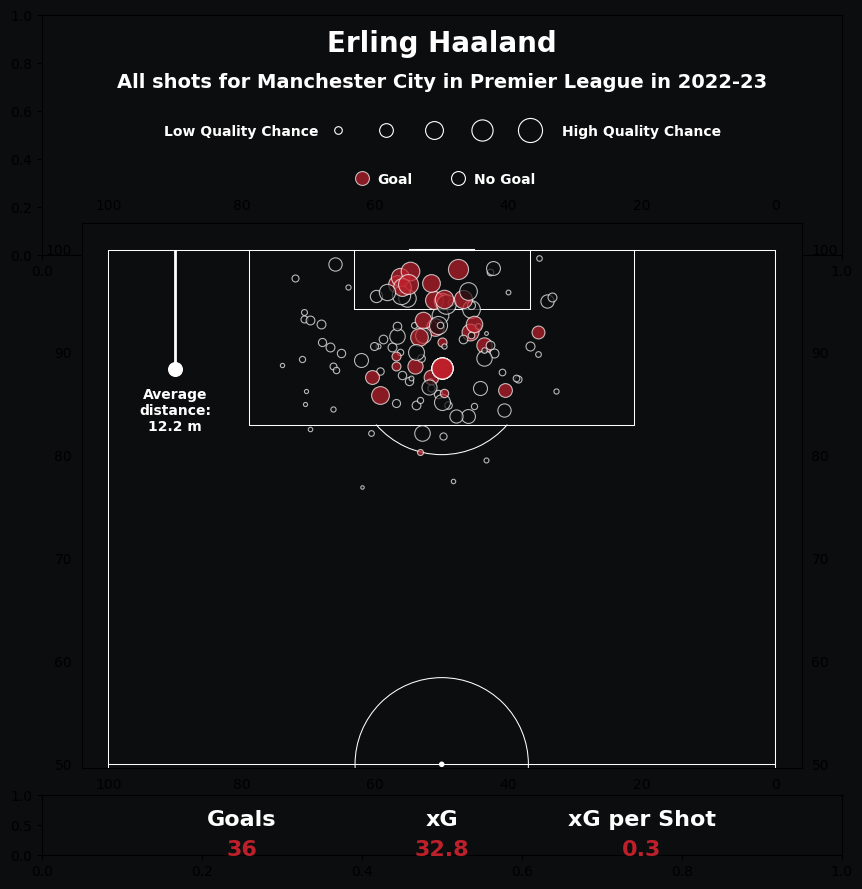

In [154]:
fig = plt.figure(figsize=(8,12))
fig.patch.set_facecolor(background_color)

# ax1 - header section
ax1 = fig.add_axes([0, .7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

# striker name
ax1.text(
    x=0.5,
    y=0.85,
    s=striker_name,
    fontsize=20,
    fontweight='bold',
    color=white_color,
    ha='center'
)

# plot title
ax1.text(
    x=0.5,
    y=0.7,
    s=visual_name,
    fontsize=14,
    fontweight='bold',
    color=white_color,
    ha='center'
)

# Quality chance legend plotting 
ax1.text(
    x=0.25,
    y=0.5,
    s="Low Quality Chance",
    fontsize=10,
    fontweight='bold',
    color=white_color,
    ha='center'
)

ax1.text(
    x=0.75,
    y=0.5,
    s='High Quality Chance',
    fontsize=10,
    fontweight='bold',
    color=white_color,
    ha='center'
)

quality_chance_legend = {
    'x': np.linspace(start=0.37, stop=0.61, num=5),
    'y': [.52] * 5,
    's': np.linspace(start=30, stop=300, num=5)
}
for i in range(5):
    ax1.scatter(
        x=quality_chance_legend['x'][i],
        y=quality_chance_legend['y'][i],
        s=quality_chance_legend['s'][i],
        color=background_color,
        edgecolor=white_color,
        linewidths=.8
    )

# Goal/No goal legend
ax1.scatter(
    x=.4,
    y=.32,
    s=100,
    color=red_color,
    edgecolor=white_color,
    alpha=.7,
    linewidths=.8
)
ax1.text(
    x=.42,
    y=.3,
    s='Goal',
    fontsize=10,
    fontweight='bold',
    color=white_color
)
ax1.scatter(
    x=.52,
    y=.32,
    s=100,
    color=background_color,
    edgecolor=white_color,
    linewidths=.8
)
ax1.text(
    x=.54,
    y=.3,
    s='No Goal',
    fontsize=10,
    fontweight='bold',
    color=white_color
)

# ax2 - main section - pitch
ax2 = fig.add_axes([.05, .25, .9, .5]) # maybe the last should be .45
ax2.set_facecolor(background_color)

pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=.5,
    line_color=white_color,
    linewidth=.75,
    axis=True,
    label=True
)
pitch.draw(ax=ax2)

# plot average distance
ax2.scatter(
    x=90,
    y=point_average_distance,
    s=100,
    color=white_color,
    edgecolor=white_color,
    linewidths=.8
)
ax2.plot(
    [90,90], 
    [point_average_distance, 99.9],
    color=white_color,
    linewidth=2
)
ax2.text(
    x=90,
    y=point_average_distance - 6,
    s=f'Average\ndistance:\n{round(actual_average_distance,1)} m',
    color=white_color,
    fontsize=10,
    fontweight='bold',
    ha='center'
)

# plot shots
for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X_100'],
        x['Y_100'],
        s=300*x['xG'],
        color=red_color if x['result']=='Goal' else background_color,
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor=white_color
    )

# ax3 - lower section - metrices
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)

ax3.text(
    x=.25,
    y=.5,
    s='Goals',
    fontsize=16,
    fontweight='bold',
    color=white_color,
    ha='center'
)
ax3.text(
    x=.25,
    y=0,
    s=f'{total_goals}',
    fontsize=16,
    fontweight='bold',
    color=red_color,
    ha='center'
)

ax3.text(
    x=.5,
    y=.5,
    s='xG',
    fontsize=16,
    fontweight='bold',
    color=white_color,
    ha='center'
)
ax3.text(
    x=.5,
    y=0,
    s=f'{round(total_xG,1)}',
    fontsize=16,
    fontweight='bold',
    color=red_color,
    ha='center'
)

ax3.text(
    x=.75,
    y=.5,
    s='xG per Shot',
    fontsize=16,
    fontweight='bold',
    color=white_color,
    ha='center'
)
ax3.text(
    x=.75,
    y=0,
    s=f'{round(xG_per_shot,1)}',
    fontsize=16,
    fontweight='bold',
    color=red_color,
    ha='center'
)